# SVM이란
SVM은 매우강력한 선형, 비선형 분류, 회귀 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델입니다.

머신러닝에서 인기있는 모델에 속하고 SVM은 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합합니다.

In [2]:
# 필요 라이브러리
from sklearn.svm import SVC
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# 라지 마진 분류

In [3]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] # 꽃잎 길이 및 너비
y = iris["target"]


In [9]:
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [10]:
# SVM 분류모델
svm_clf = SVC(kernel = "linear", C=float("inf"))
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

In [15]:
plt.style.use('dark_background')

x0 = np.linspace(0,5.5,200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

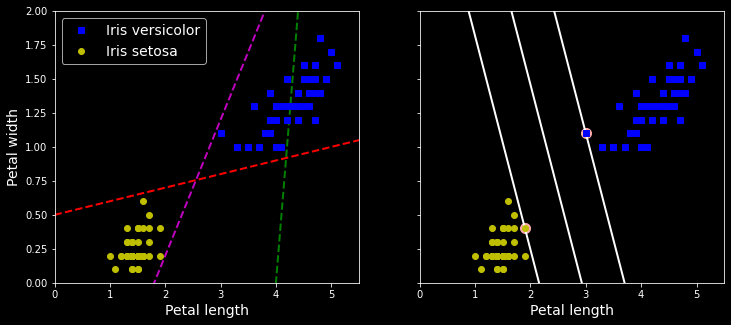

In [18]:
def plot_svc_decision_boundary(svm_clf,xmin,xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin,xmax,200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:,0],svs[:,1],s=100,facecolors='#FFAAAA')
    plt.plot(x0,decision_boundary,"w-",linewidth=2)
    plt.plot(x0,gutter_up,"w-",linewidth=2)
    plt.plot(x0,gutter_down,"w-",linewidth=2)
    
fig,axes = plt.subplots(ncols = 2, figsize = (12,5),sharey = True)

plt.sca(axes[0])
plt.plot(x0,pred_1,"g--",linewidth=2)
plt.plot(x0,pred_2,"m--",linewidth=2)
plt.plot(x0,pred_3,"r--",linewidth=2)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs',label='Iris versicolor')
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo',label='Iris setosa')
plt.xlabel('Petal length', fontsize = 14)
plt.ylabel('Petal width',fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)
plt.axis([0,5.5,0,2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf,0,5.5)
plt.plot(X[:,0][y==1],X[:,1][y==1],'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo')
plt.xlabel("Petal length",fontsize=14)
plt.axis([0,5.5,0,2])

plt.show()

(-2.0, 2.0, -2.0, 2.0)

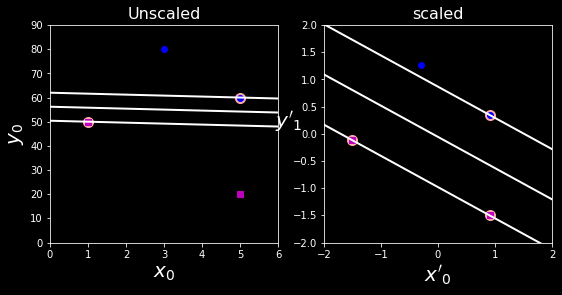

In [19]:
Xs = np.array([[1,50],[5,20],[3,80],[5,60]]).astype(np.float64)
ys = np.array([0,0,1,1])
svm_clf = SVC(kernel='linear',C=100)
svm_clf.fit(Xs,ys)
plt.style.use('dark_background')

plt.figure(figsize = (9,4))
plt.subplot(121)
plt.plot(Xs[:,0][ys==1],Xs[:,1][ys==1],'bo')
plt.plot(Xs[:,0][ys==0],Xs[:,1][ys==0],'ms')
plot_svc_decision_boundary(svm_clf,0,6)
plt.xlabel("$x_0$",fontsize=20)
plt.ylabel("$y_0$",fontsize=20)
plt.title("Unscaled",fontsize=16)
plt.axis([0,6,0,90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:,0][ys==1],X_scaled[:,1][ys==1],'bo')
plt.plot(X_scaled[:,0][ys==0],X_scaled[:,1][ys==0],'ms')
plot_svc_decision_boundary(svm_clf,-2,2)
plt.xlabel("$x'_0$",fontsize=20)
plt.ylabel("$y'_1$",fontsize=20, rotation=0)
plt.title("scaled",fontsize=16)
plt.axis([-2,2,-2,2])


SVM은 특성의 스케일에 민감합니다. 위의 그림의 왼쪽그래프에서 Y축의 스케일이 X축의 스케일보다 훨씬 커서 가장 넓은 도로가 거의 수평에 가깝게 됩니다.

특성의 스케일을 조정하면 결정경계가 훨씬 좋아집니다! (scikit-learn의 preprocessing모듈에서 StandardScaler로 간편하게 표준화시킬 수 있습니다.)

# 소프트 마진 분류

In [24]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("이상치",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [101, 10]

모든 샘플이 도로 바깥쪽에 올바르게 분류되었다면 이를 "하드 마진 분류" 라고 합니다.

하드 마진 분류에는 두가지 문제점이 있습니다. 데이터가 선형적으로 구분딜 수 있어야 제대로 작동하며 아래의 그림에서 iris 데이터셋에 이상치가 생긴다면 하드마진을 찾을 수 없습니다.

오른쪽 그래프의 결정 경계는 이상치가 없던 위의 결정경계과 매우 다르고 일반화가 잘 될것 같지는 않습니다.

​

이런 문제를 피하려면 좀 더 유연한 모델이 필요합니다. 도로의 폭을 가능한 한 넓게 유지하는 것과 "마진오류"(margin violation, 즉 샘플이 도로 중간이나 심지어 반대쪽에 있는 경우)​사이에 적절한 균형을 잡아야 합니다. 이를 "소프트 마진 분류" (soft margin classification)라고 합니다.

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [43]:
# iris data
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

# 표준화, SVM 파이프라인 구축
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [44]:
# (Petal length = 5.5, Petal width = 1.7) 예측
svm_clf.predict([[5.5,1.7]])

array([1.])

In [45]:
scaler = StandardScaler()
# C=1 SVM 모델
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
# C=100 SVM 모델
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

# 파이프라인으로 표준화, SVM 연동
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

# X, y 적합
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [46]:
# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

(4.0, 5.9, 0.8, 2.8)

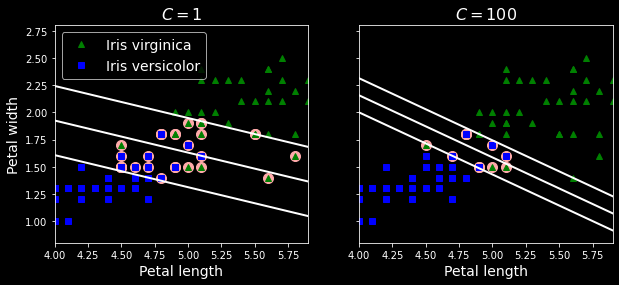

In [47]:
fig,axes = plt.subplots(ncols = 2,figsize = (10,4),sharey = True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

# SVM모델이 과적합이라면 C를 감소시켜 모델을 규제할 수 있음


# 비선형 SVM 분류
선형 SVM 분류기가 효율적이고 많은 경우에 아주 잘 작동하지만, 선형적으로 분류할 수 없는 데이터셋이 많습니다.

SVM이 비선형 데이터셋을 다루는 한가지 방법은 다항 특성과 같은 특성을 더 추가하는 것입니다. (ex. x^2 )

​

이렇게 하면 선형적으로 구분되는 데이터셋이 만들어질 수 있습니다. 아래의 왼쪽 그림은 하나의 특성 X1만을 가진 데이터셋을 나타내고 선형적으로 구분이 안됩니다.

NameError: name 'save_fig' is not defined

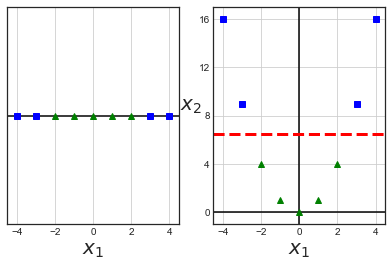

In [22]:
X1D = np.linspace(-4,4,9).reshape(-1,1)
X2D = np.c_[X1D,X1D**2]
y = np.array([0,0,1,1,1,1,1,0,0])

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

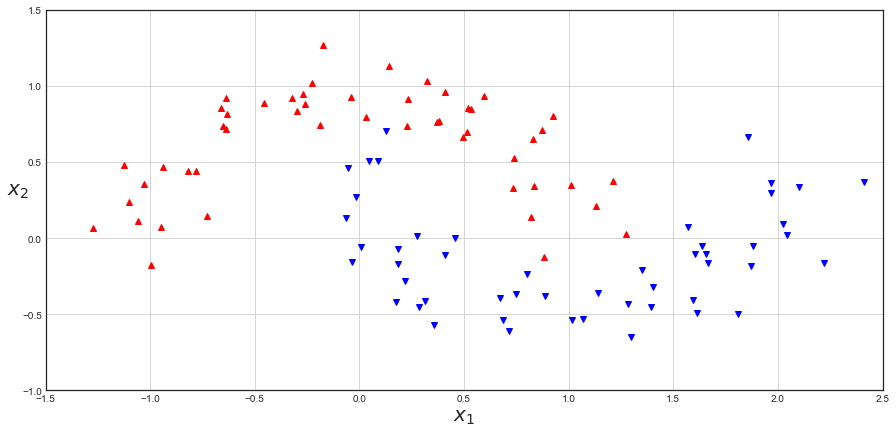

In [27]:
plt.style.use('seaborn-white')
plt.figure(figsize=(15,7))
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 100, noise = 0.15, random_state=42)
def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],'r^')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'bv')
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel(r"$x_1$",fontsize=20)
    plt.ylabel(r"$x_2$",fontsize=20,rotation=0)
    
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss='hinge',random_state=42))
])

polynomial_svm_clf.fit(X,y)

C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

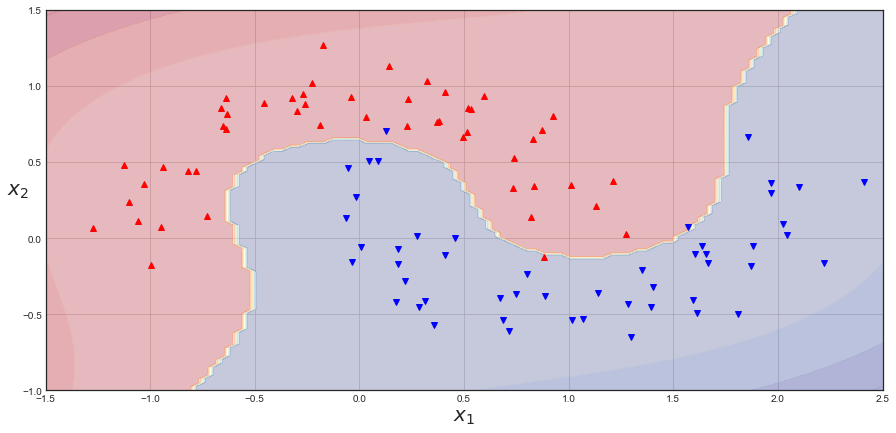

In [9]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.get_cmap('RdYlBu',5),alpha=0.3)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.get_cmap('RdYlBu',5),alpha=0.1)

plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show()

# 다항식 커널(kernel="poly")

다항식 특성을 추가하는 것은 간단하고 SVM뿐만 아니라 모든 머신러닝 알고리즘에서 잘 작동합니다. 

하지만 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 많은 특성을 추가하므로 모델을 느리게 만듭니다.

​

다행히도 SVM을 사용할 땐 "커널 트릭(kernel trick)"이라는 거의 기적에 가까운 수학적 기교를 적용할 수 있습니다.

PolynomialFeature처럼 특성을 추가하지 않으면서 다항식 특성(PolynomialFeature)을 많이 추가한 것과 같은 결과를 얻을 수 있습니다.

사실 어떤 특성도 추가하지 않기때문에 엄청난 수의 특성조합이 생기지 않습니다.

In [10]:
from sklearn.svm import SVC

# 3차 다항식
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=3,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [11]:
# 10차 다항식
poly10_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree=10,coef0=1,C=5))
])
poly10_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

NameError: name 'save_fig' is not defined

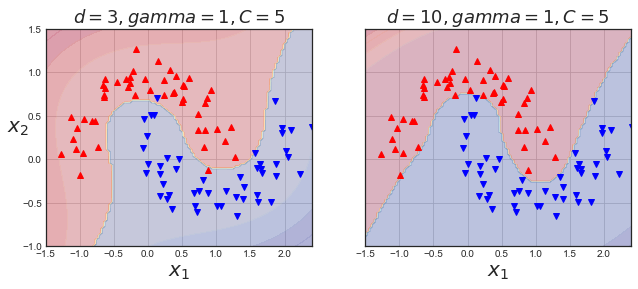

In [14]:
fig,axes = plt.subplots(ncols=2,figsize=(10.5,4),sharey = True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf,[-1.5,2.45,-1,1.5])
plot_dataset(X,y,[-1.5,2.4,-1,1.5])
plt.title(r"$d=3, gamma=1, C=5$",fontsize=18)

plt.sca(axes[1])
plot_predictions(poly10_kernel_svm_clf,(-1.5,2.45,-1,1.5))
plot_dataset(X,y,[-1.5,2.4,-1,1.5])
plt.title(r"$d=10, gamma=1, C=5$",fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

# 유사도 측정

비선형 특성을 다루는 또 다른 기법은 각 샘플이 특정 "랜드마크(landmark)"와 얼마나 닮았는지 측정하는 "유사도 함수(Similarity function)"로 계산한 특성을 추가하는 것입니다.

NameError: name 'save_fig' is not defined

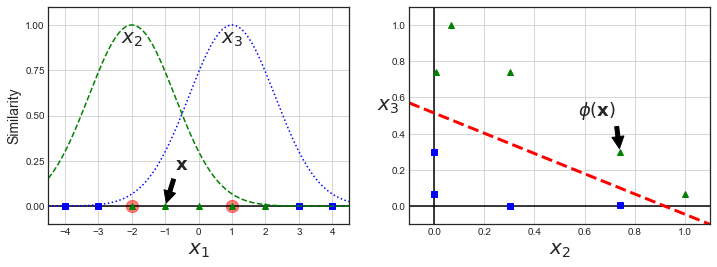

In [23]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

# 가우시안 RBF 커널
다항 특성 방식과 마친가지로 유사도 특성방식도 머신러닝 알고리즘에 유용하게 사용될 수 있습니다.

추가 특성을 모두 계산하려면 연산비용이 많이 드는데 특히 훈련세트가 클 경우 더 그렇습니다.

여기에서 커널트릭이 한번 더 SVM의 마법(?)을 만듭니다. 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 얻을 수 있습니다.

In [28]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

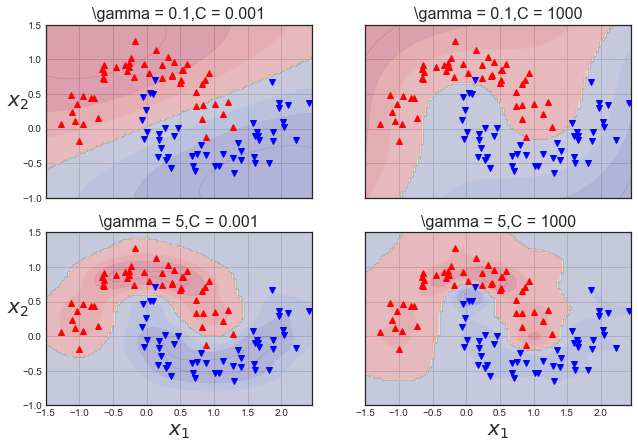

In [34]:
from sklearn.svm import SVC

gamma1,gamma2 = 0.1,5
C1,C2 = 0.001,1000
hyperparams = (gamma1,C1),(gamma1,C2),(gamma2,C1),(gamma2,C2)

svm_clfs = []
for gamma,C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ("scaler" , StandardScaler()),
        ("svm_clf", SVC(kernel='rbf',gamma = gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10.5,7),sharex =True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i%2])
    plot_predictions(svm_clf,[-1.5,2.45,-1,1.5])
    plot_dataset(X,y,[-1.5,2.45,-1,1.5])
    gamma,C = hyperparams[i]
    plt.title(r"\gamma = {},C = {}".format(gamma,C),fontsize = 16)
    if i in (0,1):
        plt.xlabel("")
    if i in (1,3):
        plt.ylabel("")

plt.show()

위의 시각화는 하이퍼 파라미터 gamma와 C를 바꾸어서 훈련시킬 모델입니다. 

gamma를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아집니다. 결정 경계가 조금 더 불규칙해지고 각 샘플은 따라 구불구불하게 휘어집니다.

반대로 gamma를 감소시키면 종 모양 그래프가 넓은 범위에 걸쳐 영향을 주므로 결정 경계가 더 부드러워집니다.

결국 하이퍼 파라미터 "gamma"가 규제의 역할을 합니다. 모델이 과대적합일 경우엔 감소시켜야하고, 과소적합일 경우엔 증가시켜야합니다. (하이퍼 파라미터 C와 비슷합니다.)

In [38]:
linear_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC())
])
linear_svm_clf.fit(X,y)

polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss= 'hinge', random_state = 42))
])
polynomial_svm_clf.fit(X,y)

poly_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="poly",degree = 3, coef0 = 1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

rbf_kernel_svm_clf = Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='rbf',C=10))
])
rbf_kernel_svm_clf.fit(X,y)


C:\Users\user\anaconda3\envs\geo_env\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC(C=10))])

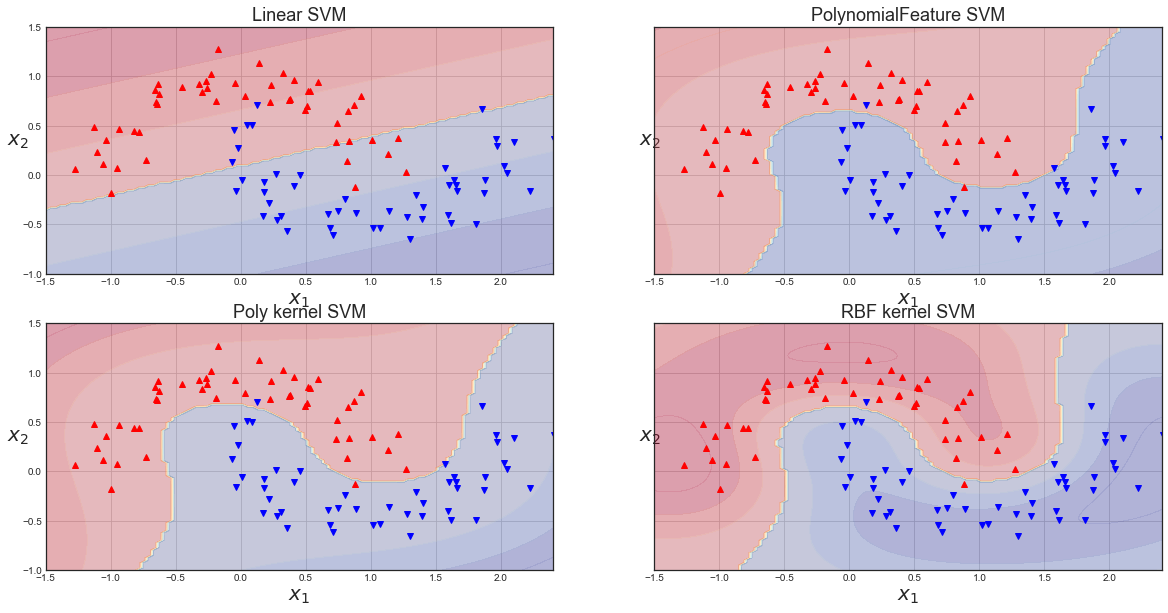

In [41]:
fig,axes = plt.subplots(2,2, figsize=(20,10), sharey=True)

plt.sca(axes[0,0])
plot_predictions(linear_svm_clf,[-1.5,2.45,-1,1.5])
plot_dataset(X,y,[-1.5,2.4,-1,1.5])
plt.title("Linear SVM",fontsize = 18)

plt.sca(axes[0,1])
plot_predictions(polynomial_svm_clf,[-1.5,2.45,-1,1.5])
plot_dataset(X,y,[-1.5,2.4,-1,1.5])
plt.title("PolynomialFeature SVM",fontsize = 18)

plt.sca(axes[1,0])
plot_predictions(poly_kernel_svm_clf,[-1.5,2.45,-1,1.5])
plot_dataset(X,y,[-1.5,2.4,-1,1.5])
plt.title("Poly kernel SVM",fontsize = 18)

plt.sca(axes[1,1])
plot_predictions(rbf_kernel_svm_clf,[-1.5,2.45,-1,1.5])
plot_dataset(X,y,[-1.5,2.4,-1,1.5])
plt.title("RBF kernel SVM",fontsize = 18)

plt.show()